# Calcul ETb et WPb Multi-Années

**Objectif**: Calculer ETb et WPb pour toutes les années (2018-2023) en utilisant la classe `ETbCalculator`

## Contenu
1. Charger le masque cropland
2. Utiliser `ETbCalculator` pour calculer ETb et WPb
3. Traiter toutes les années
4. Créer un DataFrame temporel
5. Visualisations temporelles et spatiales
6. Sauvegarder les résultats

**Rappel des formules**:
- **ETb** = max(AETI - P_effective, 0) → Eau d'irrigation
- **WPb** = TBP / ETb → Efficacité de production (kg/m³)

## 6. Cartes Multi-Années - ETb

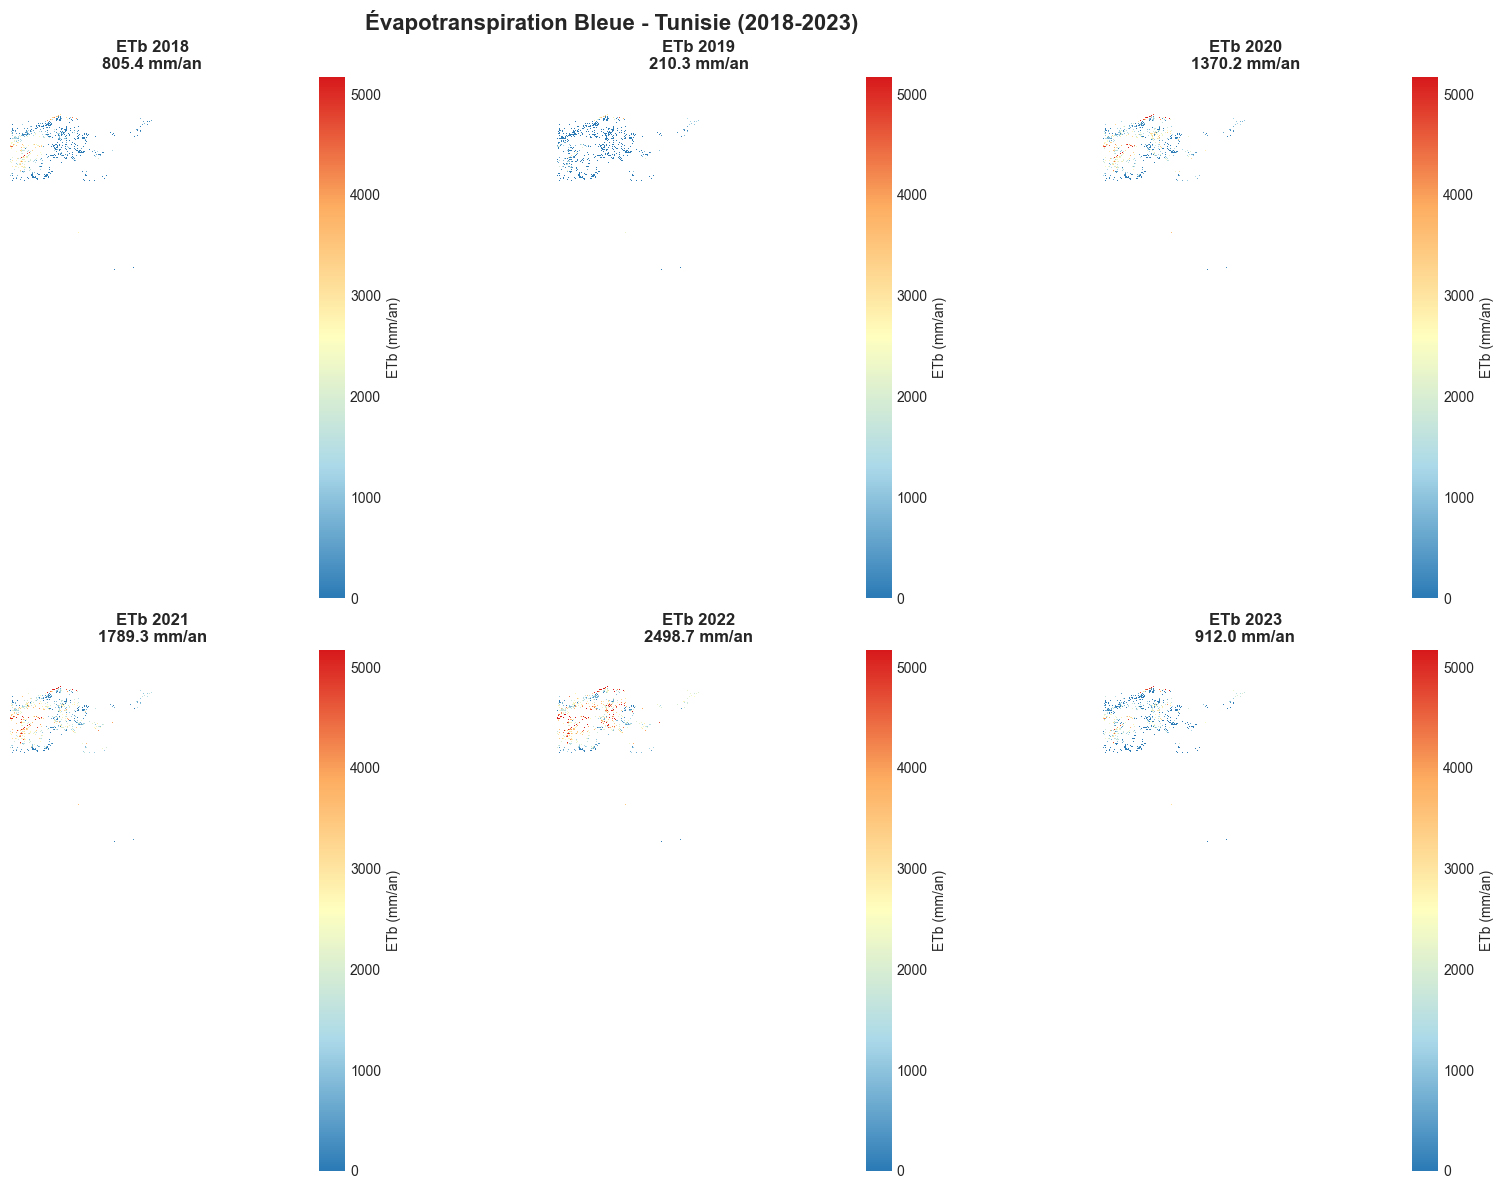

💾 Cartes sauvegardées: results/maps/etb_multiyear_maps.png


In [8]:
# Grille de cartes
n_years = len(etb_rasters)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Colormap
colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
cmap = LinearSegmentedColormap.from_list('water', colors[::-1])

# vmin/vmax global
all_etb = np.concatenate([etb_rasters[y].flatten() for y in sorted(etb_rasters.keys())])
vmin, vmax = np.nanpercentile(all_etb, [2, 98])

# Tracer
for idx, year in enumerate(sorted(etb_rasters.keys())):
    ax = axes[idx]
    im = ax.imshow(etb_rasters[year], cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
    ax.set_title(f'ETb {year}\n{df_etb[df_etb["year"]==year]["etb_mean"].values[0]:.1f} mm/an', 
                 fontsize=12, fontweight='bold')
    ax.axis('off')
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('ETb (mm/an)', fontsize=10)

plt.suptitle('Évapotranspiration Bleue - Tunisie (2018-2023)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("../results/maps/etb_multiyear_maps.png", dpi=300, bbox_inches='tight')
plt.show()

print("💾 Cartes sauvegardées: results/maps/etb_multiyear_maps.png")

## 5. Visualisation Temporelle - WPb

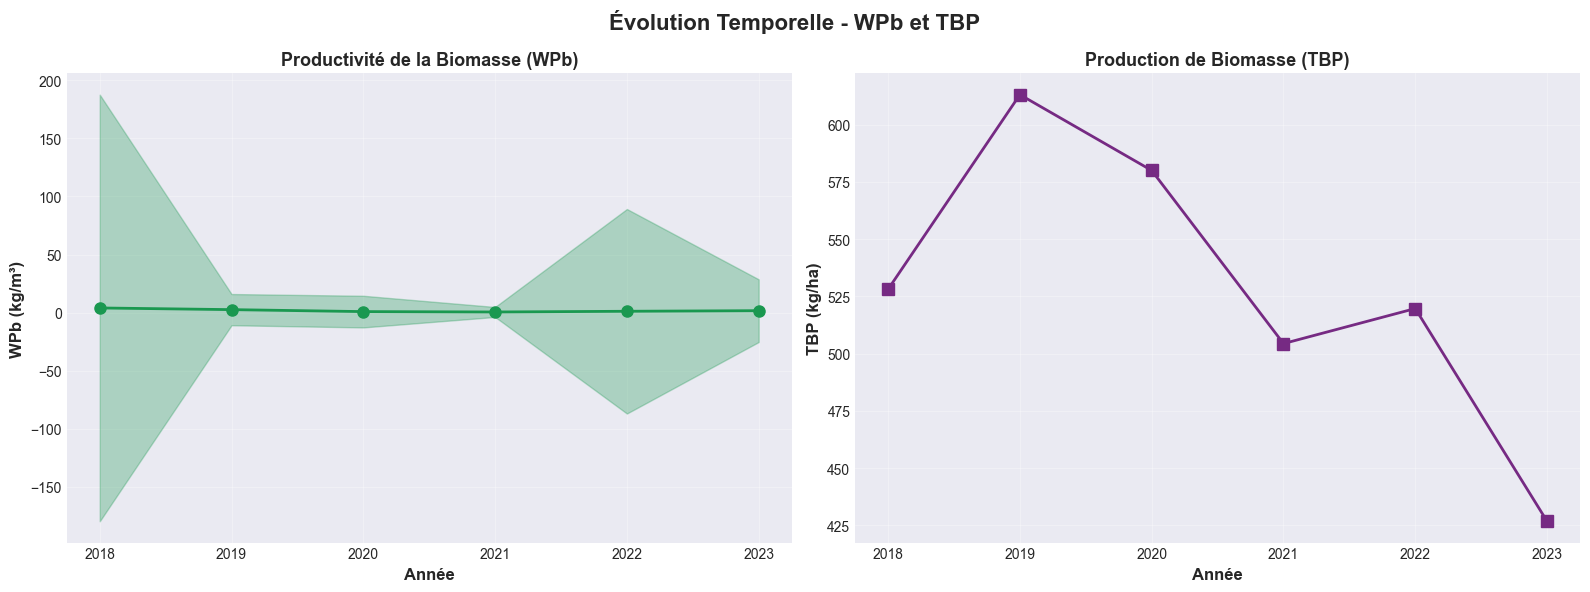

💾 Graphique sauvegardé: results/graphs/wpb_temporal_analysis.png


In [7]:
if wpb_stats_list:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # WPb moyen
    ax = axes[0]
    ax.plot(df_wpb['year'], df_wpb['wpb_mean'], marker='o', linewidth=2, markersize=8, color='#1a9850')
    ax.fill_between(df_wpb['year'], 
                     df_wpb['wpb_mean'] - df_wpb['wpb_std'], 
                     df_wpb['wpb_mean'] + df_wpb['wpb_std'], 
                     alpha=0.3, color='#1a9850')
    ax.set_xlabel('Année', fontsize=12, fontweight='bold')
    ax.set_ylabel('WPb (kg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Productivité de la Biomasse (WPb)', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # TBP moyen
    ax = axes[1]
    ax.plot(df_wpb['year'], df_wpb['tbp_mean'], marker='s', linewidth=2, markersize=8, color='#762a83')
    ax.set_xlabel('Année', fontsize=12, fontweight='bold')
    ax.set_ylabel('TBP (kg/ha)', fontsize=12, fontweight='bold')
    ax.set_title('Production de Biomasse (TBP)', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.suptitle('Évolution Temporelle - WPb et TBP', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig("../results/graphs/wpb_temporal_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Graphique sauvegardé: results/graphs/wpb_temporal_analysis.png")
else:
    print("⚠️ Pas de données WPb disponibles")

## 4. Visualisation Temporelle - ETb

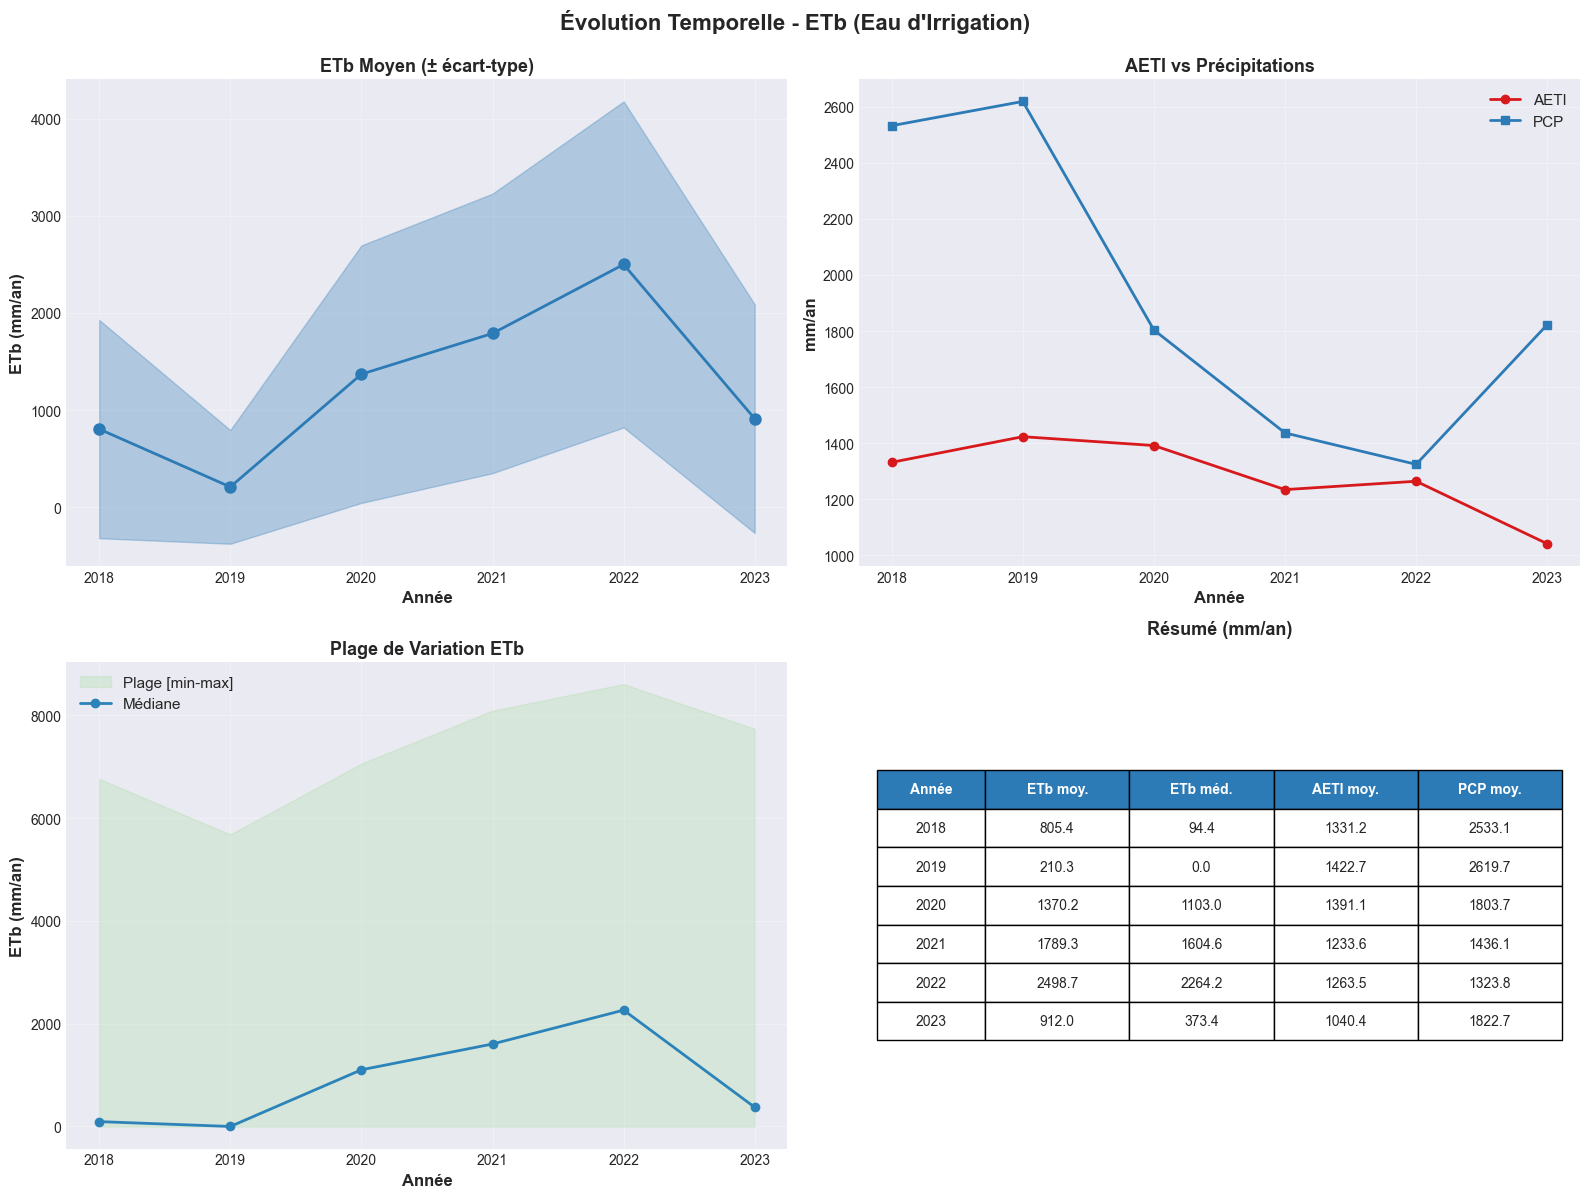

💾 Graphique sauvegardé: results/graphs/etb_temporal_analysis.png


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ETb moyen
ax = axes[0, 0]
ax.plot(df_etb['year'], df_etb['etb_mean'], marker='o', linewidth=2, markersize=8, color='#2c7bb6')
ax.fill_between(df_etb['year'], 
                 df_etb['etb_mean'] - df_etb['etb_std'], 
                 df_etb['etb_mean'] + df_etb['etb_std'], 
                 alpha=0.3, color='#2c7bb6')
ax.set_xlabel('Année', fontsize=12, fontweight='bold')
ax.set_ylabel('ETb (mm/an)', fontsize=12, fontweight='bold')
ax.set_title('ETb Moyen (± écart-type)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# AETI vs PCP
ax = axes[0, 1]
ax.plot(df_etb['year'], df_etb['aeti_mean'], marker='o', linewidth=2, label='AETI', color='#d7191c')
ax.plot(df_etb['year'], df_etb['pcp_mean'], marker='s', linewidth=2, label='PCP', color='#2c7bb6')
ax.set_xlabel('Année', fontsize=12, fontweight='bold')
ax.set_ylabel('mm/an', fontsize=12, fontweight='bold')
ax.set_title('AETI vs Précipitations', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# ETb min/max
ax = axes[1, 0]
ax.fill_between(df_etb['year'], df_etb['etb_min'], df_etb['etb_max'], 
                alpha=0.3, color='#abdda4', label='Plage [min-max]')
ax.plot(df_etb['year'], df_etb['etb_median'], marker='o', linewidth=2, 
        color='#2b83ba', label='Médiane')
ax.set_xlabel('Année', fontsize=12, fontweight='bold')
ax.set_ylabel('ETb (mm/an)', fontsize=12, fontweight='bold')
ax.set_title('Plage de Variation ETb', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Tableau récapitulatif
ax = axes[1, 1]
ax.axis('off')
table_data = [[int(row['year']), f"{row['etb_mean']:.1f}", f"{row['etb_median']:.1f}", 
               f"{row['aeti_mean']:.1f}", f"{row['pcp_mean']:.1f}"] for _, row in df_etb.iterrows()]
table = ax.table(cellText=table_data,
                colLabels=['Année', 'ETb moy.', 'ETb méd.', 'AETI moy.', 'PCP moy.'],
                cellLoc='center', loc='center', colWidths=[0.15, 0.2, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
for i in range(5):
    table[(0, i)].set_facecolor('#2c7bb6')
    table[(0, i)].set_text_props(weight='bold', color='white')
ax.set_title('Résumé (mm/an)', fontsize=13, fontweight='bold', pad=20)

plt.suptitle('Évolution Temporelle - ETb (Eau d\'Irrigation)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig("../results/graphs/etb_temporal_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print("💾 Graphique sauvegardé: results/graphs/etb_temporal_analysis.png")

## 3. Créer DataFrame Temporel

In [5]:
# Créer DataFrames
df_etb = pd.DataFrame(etb_stats_list).sort_values('year')
print("📊 Statistiques ETb (2018-2023):\n")
print(df_etb.to_string(index=False))

if wpb_stats_list:
    df_wpb = pd.DataFrame(wpb_stats_list).sort_values('year')
    print("\n\n📊 Statistiques WPb (2018-2023):\n")
    print(df_wpb.to_string(index=False))
    
    # Fusionner
    df_combined = pd.merge(df_etb, df_wpb, on='year', how='left', suffixes=('_etb', '_wpb'))
else:
    df_combined = df_etb

# Sauvegarder
stats_output = f"{processed_dir}/temporal_statistics.csv"
df_combined.to_csv(stats_output, index=False)
print(f"\n💾 Statistiques sauvegardées: {stats_output}")

📊 Statistiques ETb (2018-2023):

 etb_min     etb_max    etb_mean  etb_median     etb_std   aeti_mean    pcp_mean  year
     0.0 6763.120117  805.407555   94.424316 1122.603613 1331.162964 2533.091797  2018
     0.0 5681.810547  210.298226    0.000000  584.527774 1422.669556 2619.674805  2019
     0.0 7060.451172 1370.211462 1102.990234 1324.354907 1391.065063 1803.679810  2020
     0.0 8091.229492 1789.274673 1604.646484 1437.670218 1233.642090 1436.073853  2021
     0.0 8607.203125 2498.719644 2264.159180 1676.705584 1263.545044 1323.829346  2022
     0.0 7737.909180  911.970963  373.357910 1175.858915 1040.389526 1822.707153  2023


📊 Statistiques WPb (2018-2023):

 wpb_min      wpb_max  wpb_mean  wpb_median    wpb_std   tbp_mean  year
     0.0 15646.408203  4.010718    0.295286 183.612385 528.117249  2018
     0.0   314.428955  2.566278    0.598898  13.432102 613.129944  2019
     0.0  1362.498779  0.874398    0.284189  13.621014 580.015320  2020
     0.0   259.277374  0.549548    

## 2. Traitement Multi-Années (2018-2023)

In [4]:
# Années à traiter
years = [2018, 2019, 2020, 2021, 2022, 2023]

# Stocker les résultats
etb_stats_list = []
wpb_stats_list = []
etb_rasters = {}
wpb_rasters = {}

print("🔄 Traitement multi-années\n")
print(f"📅 Années: {years}\n")

# Boucle sur les années
for year in years:
    try:
        print(f"\n{'='*60}")
        print(f"  Année {year}")
        print(f"{'='*60}")
        
        # Fichiers source
        aeti_file = f"{data_dir}/ET/AETI_L1_{year}.tif"
        pcp_file = f"{data_dir}/PCP/PCP_L1_{year}.tif"
        tbp_file = f"{data_dir}/TBP/TBP_L2_{year}.tif"
        
        # Calculer ETb
        etb_annual, etb_cropland, etb_stats = calculator.calculate_etb(
            aeti_file=aeti_file,
            pcp_file=pcp_file,
            cropland_mask=cropland_mask,
            use_annual_approximation=True
        )
        
        # Ajouter l'année aux stats
        etb_stats['year'] = year
        etb_stats_list.append(etb_stats)
        etb_rasters[year] = etb_cropland
        
        # Sauvegarder ETb
        etb_output = f"{processed_dir}/ETb_annual/ETb_{year}.tif"
        with rasterio.open(etb_output, 'w', **mask_profile) as dst:
            dst.write(etb_annual, 1)
        print(f"💾 ETb sauvegardé: {etb_output}")
        
        # Calculer WPb
        wpb_annual, wpb_cropland, wpb_stats = calculator.calculate_wpb(
            tbp_file=tbp_file,
            etb_annual=etb_annual,
            etb_profile=mask_profile,
            cropland_mask=cropland_mask
        )
        
        if wpb_stats is not None:
            wpb_stats['year'] = year
            wpb_stats_list.append(wpb_stats)
            wpb_rasters[year] = wpb_cropland
            
            # Sauvegarder WPb
            wpb_output = f"{processed_dir}/WPb_annual/WPb_{year}.tif"
            with rasterio.open(wpb_output, 'w', **mask_profile) as dst:
                dst.write(wpb_annual, 1)
            print(f"💾 WPb sauvegardé: {wpb_output}")
        
    except Exception as e:
        print(f"❌ Erreur pour {year}: {e}")
        continue

print(f"\n{'='*60}")
print(f"✅ Traitement terminé")
print(f"  ETb calculé pour {len(etb_stats_list)} années")
print(f"  WPb calculé pour {len(wpb_stats_list)} années")
print(f"{'='*60}\n")

INFO:analysis.etb_calculator:Calcul de ETb
INFO:analysis.etb_calculator:  AETI: AETI_L1_2018.tif
INFO:analysis.etb_calculator:  PCP:  PCP_L1_2018.tif
INFO:analysis.etb_calculator:  AETI: AETI_L1_2018.tif
INFO:analysis.etb_calculator:  PCP:  PCP_L1_2018.tif
INFO:analysis.etb_calculator:  Rééchantillonnage PCP: (149, 81) → (2560, 1399)
INFO:analysis.etb_calculator:  Rééchantillonnage PCP: (149, 81) → (2560, 1399)


🔄 Traitement multi-années

📅 Années: [2018, 2019, 2020, 2021, 2022, 2023]


  Année 2018


INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  ETb moyen: 805.4 mm/an
INFO:analysis.etb_calculator:  ETb moyen: 805.4 mm/an
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2018.tif
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2018.tif


💾 ETb sauvegardé: ../data/processed/ETb_annual/ETb_2018.tif


INFO:analysis.etb_calculator:  Rééchantillonnage TBP: (7680, 4198) → (2560, 1399)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
INFO:analysis.etb_calculator:  WPb moyen: 4.01 kg/m³
INFO:analysis.etb_calculator:  

💾 WPb sauvegardé: ../data/processed/WPb_annual/WPb_2018.tif

  Année 2019


INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  ETb moyen: 210.3 mm/an
INFO:analysis.etb_calculator:  ETb moyen: 210.3 mm/an
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2019.tif
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2019.tif


💾 ETb sauvegardé: ../data/processed/ETb_annual/ETb_2019.tif


INFO:analysis.etb_calculator:  Rééchantillonnage TBP: (7680, 4198) → (2560, 1399)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
INFO:analysis.etb_calculator:  WPb moyen: 2.57 kg/m³
INFO:analysis.etb_calculator:  

💾 WPb sauvegardé: ../data/processed/WPb_annual/WPb_2019.tif

  Année 2020


INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  ETb moyen: 1370.2 mm/an
INFO:analysis.etb_calculator:  ETb moyen: 1370.2 mm/an
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2020.tif
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2020.tif


💾 ETb sauvegardé: ../data/processed/ETb_annual/ETb_2020.tif


INFO:analysis.etb_calculator:  Rééchantillonnage TBP: (7680, 4198) → (2560, 1399)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
INFO:analysis.etb_calculator:  WPb moyen: 0.87 kg/m³
INFO:analysis.etb_calculator:  

💾 WPb sauvegardé: ../data/processed/WPb_annual/WPb_2020.tif

  Année 2021


INFO:analysis.etb_calculator:  Rééchantillonnage PCP: (149, 81) → (2560, 1399)
INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  ETb moyen: 1789.3 mm/an
INFO:analysis.etb_calculator:  ETb moyen: 1789.3 mm/an
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2021.tif
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2021.tif


💾 ETb sauvegardé: ../data/processed/ETb_annual/ETb_2021.tif


INFO:analysis.etb_calculator:  Rééchantillonnage TBP: (7680, 4198) → (2560, 1399)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
INFO:analysis.etb_calculator:  WPb moyen: 0.55 kg/m³
INFO:analysis.etb_calculator:  

💾 WPb sauvegardé: ../data/processed/WPb_annual/WPb_2021.tif

  Année 2022


INFO:analysis.etb_calculator:  Rééchantillonnage PCP: (149, 81) → (2560, 1399)
INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  ETb moyen: 2498.7 mm/an
INFO:analysis.etb_calculator:  ETb moyen: 2498.7 mm/an
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2022.tif
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2022.tif


💾 ETb sauvegardé: ../data/processed/ETb_annual/ETb_2022.tif


INFO:analysis.etb_calculator:  Rééchantillonnage TBP: (7680, 4198) → (2560, 1399)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
INFO:analysis.etb_calculator:  WPb moyen: 1.16 kg/m³
INFO:analysis.etb_calculator:  

💾 WPb sauvegardé: ../data/processed/WPb_annual/WPb_2022.tif

  Année 2023


INFO:analysis.etb_calculator:  P_effective ≈ 0.7 * P_annual
INFO:analysis.etb_calculator:  ETb moyen: 912.0 mm/an
INFO:analysis.etb_calculator:  ETb moyen: 912.0 mm/an
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2023.tif
c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
INFO:analysis.etb_calculator:Calcul de WPb
INFO:analysis.etb_calculator:  TBP: TBP_L2_2023.tif


💾 ETb sauvegardé: ../data/processed/ETb_annual/ETb_2023.tif


INFO:analysis.etb_calculator:  Rééchantillonnage TBP: (7680, 4198) → (2560, 1399)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: divide by zero encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
c:\SDG641_Tunisia_WaterProductivity\notebooks\../src\analysis\etb_calculator.py:246: RuntimeWarning: invalid value encountered in divide
  wpb_annual = np.where(etb_m3_ha > 0, tbp_annual / etb_m3_ha, np.nan)
INFO:analysis.etb_calculator:  WPb moyen: 1.67 kg/m³
INFO:analysis.etb_calculator:  

💾 WPb sauvegardé: ../data/processed/WPb_annual/WPb_2023.tif

✅ Traitement terminé
  ETb calculé pour 6 années
  WPb calculé pour 6 années



c:\SDG641_Tunisia_WaterProductivity\venv\lib\site-packages\numpy\_core\_asarray.py:127: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)


## 1. Configuration et Chargement du Masque

In [3]:
# Chemins
data_dir = "../data/raw"
processed_dir = "../data/processed"
mask_file = f"{processed_dir}/cropland_mask_wapor.tif"

# Créer répertoires de sortie
os.makedirs(f"{processed_dir}/ETb_annual", exist_ok=True)
os.makedirs(f"{processed_dir}/WPb_annual", exist_ok=True)
os.makedirs("../results/graphs", exist_ok=True)
os.makedirs("../results/maps", exist_ok=True)

# Charger masque cropland
print("🌾 Chargement du masque cropland...")
with rasterio.open(mask_file) as src:
    cropland_mask = src.read(1)
    mask_profile = src.profile

print(f"✓ Masque chargé: {cropland_mask.shape}")
print(f"  Pixels cropland > 0: {np.sum(cropland_mask > 0):,}")

# Initialiser le calculateur
calculator = ETbCalculator(peff_factor=0.7)
print("\n✓ ETbCalculator initialisé")

🌾 Chargement du masque cropland...


INFO:analysis.etb_calculator:ETbCalculator initialisé (P_eff factor=0.7)


✓ Masque chargé: (2560, 1399)
  Pixels cropland > 0: 18,036

✓ ETbCalculator initialisé


In [2]:
# Imports
import sys
sys.path.append('../src')

import os
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from analysis.etb_calculator import ETbCalculator

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Modules importés")

✓ Modules importés
